In [4]:
!pip install tensorflow

In [5]:
!pip install pandas openpyxl

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [55]:
from typing import Hashable, NamedTuple, Callable, Tuple, Union


class Ballot(NamedTuple):
    ranking: tuple[Hashable, ...]
    tally: int

Result = Tuple[Hashable | None, bool]

In [7]:
data = pd.read_stata("../CCES16_Common_OUTPUT_Feb2018_VV.dta")
xls_data = pd.read_excel('../federalelections2016.xlsx', sheet_name=None)
df = pd.DataFrame(data)


/Users/alisartazkhan/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/Users/alisartazkhan/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [8]:
features = [
    "CC16_301a",
    "CC16_301b",
    "CC16_301c",
    "CC16_301d",
    "CC16_301e",
    "CC16_301f",
    "CC16_301g",
    "CC16_301h",
    "CC16_301i",
    "CC16_301j",
     "CC16_301k",
     "CC16_301l",
     "CC16_301m",
     "CC16_301n",
     "CC16_301o"
]
print(data["CC16_301a"].isna().sum())
data = data.dropna(subset=features)
print(data["CC16_301a"].isna().sum())
print(data["CC16_301a"])

51356
0
7            Very High Importance
20       Somewhat High Importance
22       Somewhat High Importance
26       Somewhat High Importance
30           Very High Importance
                   ...           
22597    Somewhat High Importance
22599    Somewhat High Importance
22678     Somewhat Low Importance
22685        Very High Importance
22862        No Importance at All
Name: CC16_301a, Length: 13143, dtype: category
Categories (5, object): ['Very High Importance' < 'Somewhat High Importance' < 'Somewhat Low Importance' < 'Very Low Importance' < 'No Importance at All']


In [9]:
import pandas as pd

# Assuming your data is loaded as 'data'
# data = pd.read_stata("../CCES16_Common_OUTPUT_Feb2018_VV.dta")

# Mapping dictionary
importance_mapping = {
    'Very High Importance': 5,
    'Somewhat High Importance': 4,
    'Somewhat Low Importance': 3,
    'Very Low Importance': 2,
    'No Importance at All': 1
    
}

print(data[features].head())

# Apply the mapping to each feature column
for feature in features:
    data[feature] = data[feature].map(importance_mapping)

# Check the conversion result for one of the columns
print(data[features].head())


                   CC16_301a                 CC16_301b  \
7       Very High Importance      Very High Importance   
20  Somewhat High Importance  Somewhat High Importance   
22  Somewhat High Importance   Somewhat Low Importance   
26  Somewhat High Importance  Somewhat High Importance   
30      Very High Importance      Very High Importance   

                   CC16_301c                 CC16_301d  \
7       Very High Importance  Somewhat High Importance   
20  Somewhat High Importance  Somewhat High Importance   
22  Somewhat High Importance  Somewhat High Importance   
26  Somewhat High Importance  Somewhat High Importance   
30      Very High Importance      Very High Importance   

                   CC16_301e                 CC16_301f  \
7   Somewhat High Importance   Somewhat Low Importance   
20  Somewhat High Importance  Somewhat High Importance   
22  Somewhat High Importance      Very High Importance   
26  Somewhat High Importance       Very Low Importance   
30      Very

In [10]:
# Filter CCES data for Trump/Clinton voters
# major_voters = data[data['CC16_410_a'].isin([1, 2])]  # 1=Trump, 2=Clinton
trump_voters = data[data['CC16_410a'].isin(["Donald Trump (Republican)"])]
clinton_voters = data[data['CC16_410a'].isin(["Hillary Clinton (Democrat)"])]
third_party_voters = data[data['CC16_410a'].isin(["Gary Johnson (Libertarian)", "Jill Stein (Green)", "Evan McMullin (Independent)"])]
gary_voters = data[data['CC16_410a'].isin(["Gary Johnson (Libertarian)"])]
jill_voters = data[data['CC16_410a'].isin(["Jill Stein (Green)"])]
evan_voters = data[data['CC16_410a'].isin(["Evan McMullin (Independent)"])]

In [11]:
all_voters = pd.concat([trump_voters, clinton_voters])
all_voters['label'] = all_voters['CC16_410a'].apply(lambda x: 0 if x == "Donald Trump (Republican)" else 1)

In [12]:
# Feature and target separation
X = all_voters[features]
y = all_voters['label']

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

def vis(predictions, name):
    # Count the number of predicted leanings and normalize to get percentages
    predicted_percentages = pd.Series(predictions).value_counts(normalize=True) * 100

    # Create a bar chart
    predicted_percentages.plot(kind='bar', color=['red', 'blue'])

    # Setting the title and labels
    plt.title(f'Predicted Leanings of {name} Voters (%)')
    plt.xlabel('Predicted Vote')
    plt.ylabel('Percentage')
    plt.xticks(ticks=[0, 1], labels=['Trump', 'Clinton'], rotation=0)  # 0 for Trump, 1 for Clinton

    # Show the plot
    plt.show()

# Usage example with dummy data
# predictions_example = [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]  # Some dummy prediction data
# vis(predictions_example, "Sample Group")


In [14]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test = third_party_voters[features]

In [15]:
# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
g_test = gary_voters[features]
j_test = jill_voters[features]
e_test = evan_voters[features]


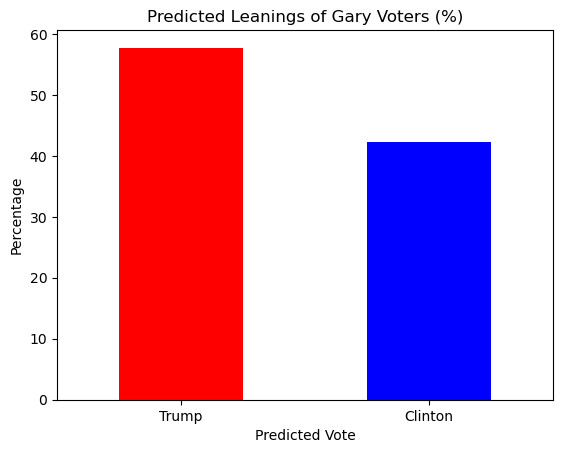

In [25]:
g_predictions = model.predict(g_test)
vis(g_predictions, "Gary")
gpp = pd.Series(g_predictions).value_counts(normalize=True) * 100


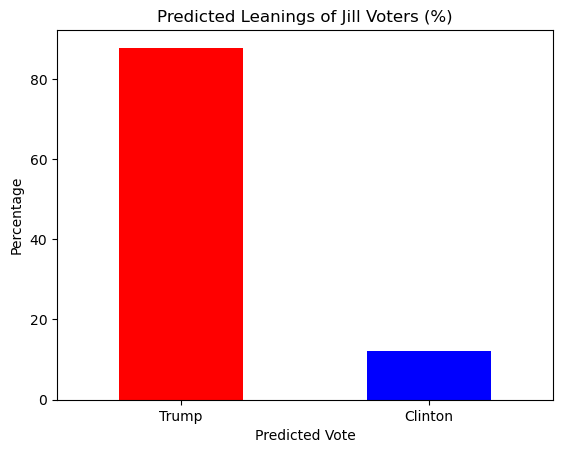

In [26]:
j_predictions = model.predict(j_test)
vis(j_predictions, "Jill")
jpp = pd.Series(j_predictions).value_counts(normalize=True) * 100


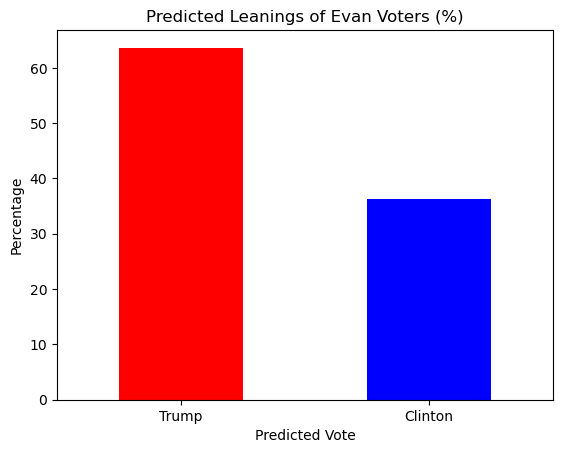

In [27]:
e_predictions = model.predict(e_test)
vis(e_predictions, "Evan")
epp = pd.Series(e_predictions).value_counts(normalize=True) * 100


In [30]:
popular_vote = xls_data["Table 1. 2016 Pres Popular Vote"]
# print(popular_vote.head())
clinton_popular_vote = popular_vote.iloc[3, 1]
trump_popular_vote = popular_vote.iloc[4, 1]
gary_popular_vote = popular_vote.iloc[5, 1]
jill_popular_vote = popular_vote.iloc[6, 1]
evan_popular_vote = popular_vote.iloc[7, 1]

total_third_party_votes = gary_popular_vote + jill_popular_vote + evan_popular_vote

In [51]:
spv = xls_data['Table 2. Electoral &  Pop Vote']
STATE = 0
TRUMP = 3
CLINTON = 4
OTHERS = 5
TOTAL = 6
without_majority = {}
majority = {}
for row in range(3, 54):
    state = spv.iloc[row, 0]
    t_votes = spv.iloc[row, TRUMP]
    c_votes = spv.iloc[row, CLINTON]
    o_votes = spv.iloc[row, OTHERS]
    total = spv.iloc[row, TOTAL]
#     print(state, t_votes, c_votes, o_votes, total)
    
    if t_votes < total / 2 and c_votes < total / 2:
        without_majority[state] = row
    else:
        majority[state] = -1
print(without_majority, majority)

    

{'AZ': 5, 'CO': 8, 'FL': 12, 'ME': 22, 'MI': 25, 'MN': 26, 'NV': 31, 'NH': 32, 'NM': 34, 'NC': 36, 'PA': 41, 'UT': 47, 'VA': 49, 'WI': 52} {'AL': -1, 'AK': -1, 'AR': -1, 'CA': -1, 'CT': -1, 'DE': -1, 'DC': -1, 'GA': -1, 'HI': -1, 'ID': -1, 'IL': -1, 'IN': -1, 'IA': -1, 'KS': -1, 'KY': -1, 'LA': -1, 'MD': -1, 'MA': -1, 'MS': -1, 'MO': -1, 'MT': -1, 'NE': -1, 'NJ': -1, 'NY': -1, 'ND': -1, 'OH': -1, 'OK': -1, 'OR': -1, 'RI': -1, 'SC': -1, 'SD': -1, 'TN': -1, 'TX': -1, 'VT': -1, 'WA': -1, 'WV': -1, 'WY': -1}


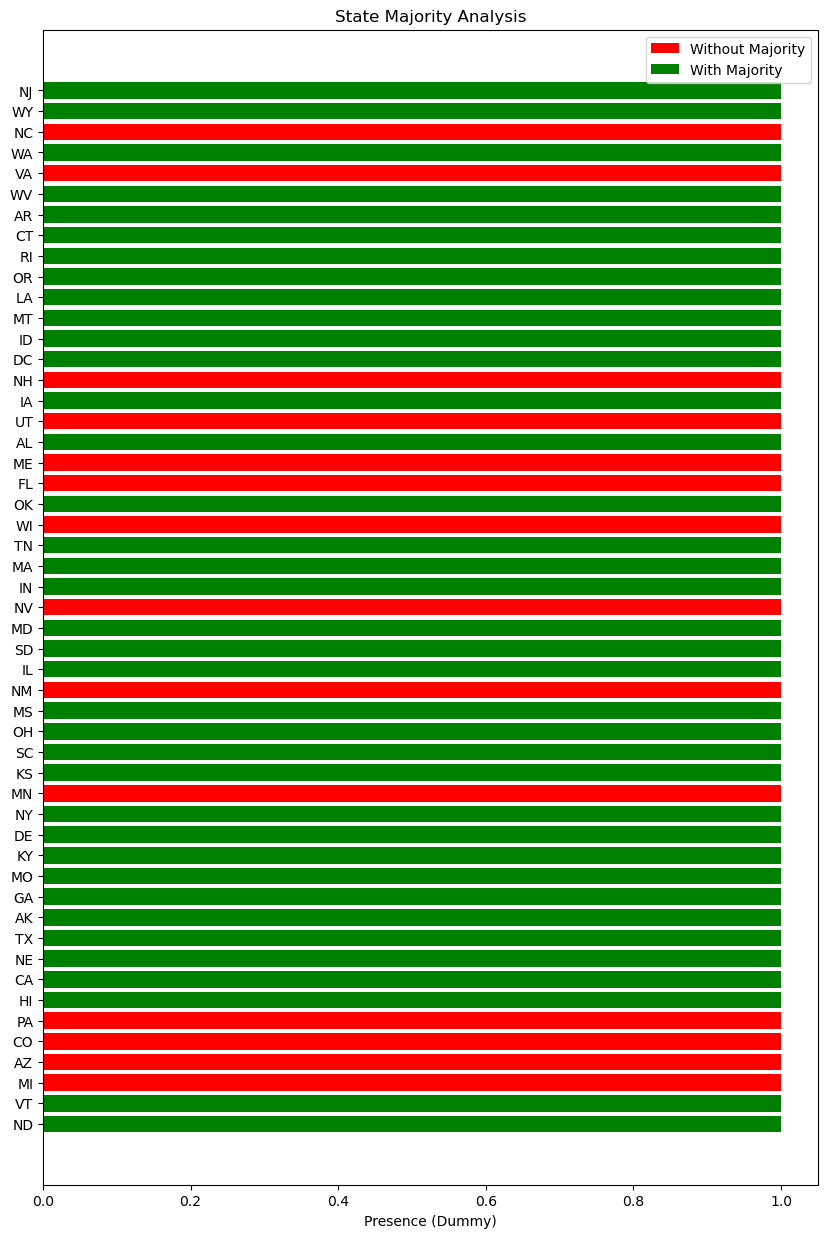

In [54]:
import matplotlib.pyplot as plt

# Preparing data for plotting
states = list(set(without_majority.keys()).union(set(majority.keys())))
colors = ['red' if state in without_majority else 'green' for state in states]
heights = [1] * len(states)  # Dummy values for bar heights

# Creating the bar chart
plt.figure(figsize=(10, 15))
plt.barh(states, heights, color=colors)
plt.xlabel('Presence (Dummy)')
plt.title('State Majority Analysis')
plt.yticks(ticks=range(len(states)), labels=states)

# Adding a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='Without Majority'),
                   Patch(facecolor='green', label='With Majority')]
plt.legend(handles=legend_elements)

plt.show()


In [74]:
ballots = {}
t = 0
c = 1
for state in without_majority:
    row = without_majority[state]
    t_votes = spv.iloc[row, TRUMP]
    c_votes = spv.iloc[row, CLINTON]
    o_votes = spv.iloc[row, OTHERS]
    g_votes = int(o_votes * (gary_popular_vote/total_third_party_votes))
    j_votes = int(o_votes * (jill_popular_vote/total_third_party_votes))
    e_votes = int(o_votes * (evan_popular_vote/total_third_party_votes))
    if state == "AZ":
        print(g_votes, o_votes, gary_popular_vote/total_third_party_votes)
        print(g_votes*(gpp[t]/100))
    ballots[state] = [Ballot(ranking=('TRUMP',), tally=t_votes),
                     Ballot(ranking=('CLINTON',), tally=c_votes),
                     Ballot(ranking=('GARY', 'TRUMP'), tally=int(g_votes*gpp[t]/100)),
                     Ballot(ranking=('GARY', 'CLINTON'), tally=int(g_votes*gpp[c]/100)),
                     Ballot(ranking=('JILL', 'TRUMP'), tally=int(j_votes*jpp[t]/100)),
                     Ballot(ranking=('JILL', 'CLINTON'), tally=int(j_votes*jpp[c]/100)),
                     Ballot(ranking=('EVAN', 'TRUMP'), tally=int(e_votes*epp[t]/100)),
                     Ballot(ranking=('EVAN', 'CLINTON'), tally=int(e_votes*epp[c]/100))]
    

107281 159597 0.6722029482447537
61935.42268041237


In [75]:

for b in ballots:
    print(b, ballots[b], end='\n\n')

AZ [Ballot(ranking=('TRUMP',), tally=1252401), Ballot(ranking=('CLINTON',), tally=1161167), Ballot(ranking=('GARY', 'TRUMP'), tally=61935), Ballot(ranking=('GARY', 'CLINTON'), tally=45345), Ballot(ranking=('JILL', 'TRUMP'), tally=4267), Ballot(ranking=('JILL', 'CLINTON'), tally=30555), Ballot(ranking=('EVAN', 'TRUMP'), tally=11131), Ballot(ranking=('EVAN', 'CLINTON'), tally=6360)]

CO [Ballot(ranking=('TRUMP',), tally=1202484), Ballot(ranking=('CLINTON',), tally=1338870), Ballot(ranking=('GARY', 'TRUMP'), tally=92708), Ballot(ranking=('GARY', 'CLINTON'), tally=67875), Ballot(ranking=('JILL', 'TRUMP'), tally=6387), Ballot(ranking=('JILL', 'CLINTON'), tally=45736), Ballot(ranking=('EVAN', 'TRUMP'), tally=16661), Ballot(ranking=('EVAN', 'CLINTON'), tally=9521)]

FL [Ballot(ranking=('TRUMP',), tally=4617886), Ballot(ranking=('CLINTON',), tally=4504975), Ballot(ranking=('GARY', 'TRUMP'), tally=115327), Ballot(ranking=('GARY', 'CLINTON'), tally=84435), Ballot(ranking=('JILL', 'TRUMP'), tally

In [86]:
def irv(ballots: List[Ballot]) -> Result:
    import itertools
    from collections import defaultdict

    # Count initial votes
    vote_counts = defaultdict(int)
    for ballot in ballots:
        if ballot.ranking:  # check if ranking is non-empty
#             print(ballot.ranking[0])
            vote_counts[ballot.ranking[0]] += ballot.tally

    total_votes = sum(vote_counts.values())
    majority = total_votes / 2

    # Simulation of voting rounds
    while True:
        # Check for majority
        for candidate, votes in vote_counts.items():
            if votes > majority:
#                 print(candidate)
                return (candidate, True)  # Return winner and no tie

        # Find candidate(s) with the least votes
        min_votes = min(vote_counts.values())
        candidates_to_remove = [candidate for candidate, votes in vote_counts.items() if votes == min_votes]

        # Check for a tie: all remaining candidates have the same number of votes
        if len(vote_counts) == len(candidates_to_remove):
            return (None, False)  # No winner, tie

        # Eliminate candidate(s) with the least votes
        for candidate in candidates_to_remove:
            del vote_counts[candidate]

        # Reallocate votes from eliminated candidates
        for ballot in ballots:
            for rank in itertools.islice(ballot.ranking, 1, None):  # Start from second preference
                if rank in vote_counts:  # If this candidate hasn't been eliminated
                    vote_counts[rank] += ballot.tally
                    break  # Stop at the first available candidate in the ranking

    return (None, False)  # In case something goes wrong, indicate a tie with no winner



In [58]:
state_electoral_votes = {
    'AL': 9, 'AK': 3, 'AZ': 11, 'AR': 6, 'CA': 55, 'CO': 9, 'CT': 7, 'DE': 3, 'FL': 29, 'GA': 16,
    'HI': 4, 'ID': 4, 'IL': 20, 'IN': 11, 'IA': 6, 'KS': 6, 'KY': 8, 'LA': 8, 'ME': 4, 'MD': 10,
    'MA': 11, 'MI': 16, 'MN': 10, 'MS': 6, 'MO': 10, 'MT': 3, 'NE': 5, 'NV': 6, 'NH': 4, 'NJ': 14,
    'NM': 5, 'NY': 29, 'NC': 15, 'ND': 3, 'OH': 18, 'OK': 7, 'OR': 7, 'PA': 20, 'RI': 4, 'SC': 9,
    'SD': 3, 'TN': 11, 'TX': 38, 'UT': 6, 'VT': 3, 'VA': 13, 'WA': 12, 'WV': 5, 'WI': 10, 'WY': 3
}

In [77]:
az = ballots["AZ"]
print(az)

[Ballot(ranking=('TRUMP',), tally=1252401), Ballot(ranking=('CLINTON',), tally=1161167), Ballot(ranking=('GARY', 'TRUMP'), tally=61935), Ballot(ranking=('GARY', 'CLINTON'), tally=45345), Ballot(ranking=('JILL', 'TRUMP'), tally=4267), Ballot(ranking=('JILL', 'CLINTON'), tally=30555), Ballot(ranking=('EVAN', 'TRUMP'), tally=11131), Ballot(ranking=('EVAN', 'CLINTON'), tally=6360)]


In [109]:
tev = int(spv.iloc[54, 1].strip('*'))
cev = int(spv.iloc[54, 2].strip('*'))
og_t = tev
og_c = cev
print(tev, cev)

304 227


In [110]:
tt = 0
ct = 0
for s, row in without_majority.items():
    trumpp = spv.iloc[row, 1]
    clintonn = spv.iloc[row, 2]
    if not pd.isna(trumpp):
        tt += int(trumpp)
    if not pd.isna(clintonn):
        ct += int(clintonn)
    
tev -= tt
cev -= ct


In [113]:
for state, ballot in ballots.items():
#     print(state)
    result, no_ties = irv(ballot)
    print(f"{state} -- Winner: {result}, No ties: {no_ties}")
    if result == "TRUMP":
        tev += state_electoral_votes[state]
    else:
        cev += state_electoral_votes[state]

AZ -- Winner: TRUMP, No ties: True
CO -- Winner: CLINTON, No ties: True
FL -- Winner: TRUMP, No ties: True
ME -- Winner: CLINTON, No ties: True
MI -- Winner: TRUMP, No ties: True
MN -- Winner: CLINTON, No ties: True
NV -- Winner: CLINTON, No ties: True
NH -- Winner: CLINTON, No ties: True
NM -- Winner: CLINTON, No ties: True
NC -- Winner: TRUMP, No ties: True
PA -- Winner: TRUMP, No ties: True
UT -- Winner: TRUMP, No ties: True
VA -- Winner: CLINTON, No ties: True
WI -- Winner: TRUMP, No ties: True


In [114]:
print(tev, cev)   


303 228


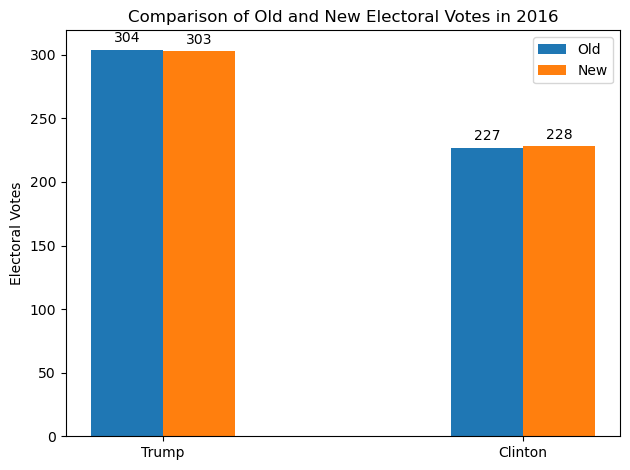

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Given coordinates
old_x, old_y = og_t, og_c
new_x, new_y = tev, cev

# Labels for the groups
labels = ['Trump', 'Clinton']

# Data to plot
old_coords = [old_x, old_y]
new_coords = [new_x, new_y]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, old_coords, width, label='Old')
rects2 = ax.bar(x + width/2, new_coords, width, label='New')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Electoral Votes')
ax.set_title('Comparison of Old and New Electoral Votes in 2016')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
